Step: 1  setup and data Loading


Step: 2 Import necessary library

In [ ]:
#Import Necessayr Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Step: 3 load datasets

In [ ]:
#Load datasets
df = pd.read_excel('IMDB Dataset.xlsx')
df.to_csv('IMDB Datasets.csv', index=False)
print(df.head())
print("\nLabel Distribution:\n",df['sentiment'].value_counts())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Label Distribution:
 sentiment
positive    1264
negative    1233
Name: count, dtype: int64


Step: 4 Text Preprocessing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Define preprocessing function
def preprocess_text(text):
    #Lowercase
    text = text.lower()
    #remove special charecter
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    #Tokenize
    words = text.split()
    #remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    #Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Apply preprocessing
df['cleaned_review'] = df['review'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to C:\Users\Diwakar
[nltk_data]     Ranjan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Diwakar
[nltk_data]     Ranjan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Step: 5 TF-IDF vectorization 

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
x= tfidf.fit_transform(df['cleaned_review'])
y= df['sentiment']
# split data
x_train , x_test ,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)

Step : 7 Model Training

In [13]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Step : 8 Evaluation

Accuracy 0.858

Classification Report:
               precision    recall  f1-score   support

    negative       0.89      0.82      0.86       256
    positive       0.83      0.89      0.86       244

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



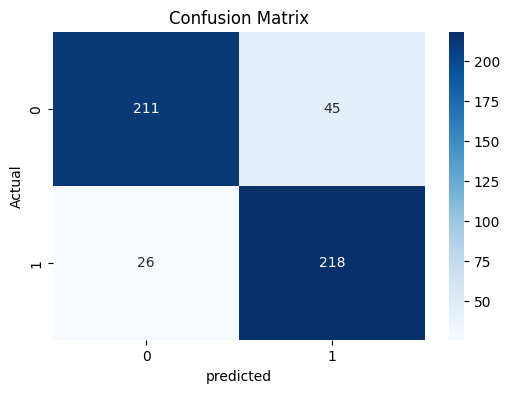

In [ ]:
# Predictions
y_pred = model.predict(x_test)

print("Accuracy", accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))
# Confusion Matrix Visualization
cm= confusion_matrix(y_test, y_pred)
plt.figure (figsize=(6,4))
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Step :9 Inference Demonstration

In [ ]:
def predict_sentiment(text):
    cleaned = preprocess_text(text)
    vectorized = tfidf.transform([cleaned])
    prediction= model.predict(vectorized)[0]
    probability = model.predict_proba(vectorized).max()
    return f"predicted: {prediction}(confidence: {probability:.2f})"
# Test with new reviews
print(predict_sentiment("the product is amazing!"))
print(predict_sentiment("Terrible experience, would not recommend."))

predicted: positive(confidence: 0.61)
predicted: negative(confidence: 0.61)
